In [88]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [89]:
# loading data from csvs
password = pd.read_csv('data/csvs/password.csv')
quest = pd.read_csv('data/csvs/quest.csv')
csquestquant = pd.read_csv('data/csvs/csquestquant.csv')
demo = pd.read_csv('data/csvs/demo.csv')
strategy = pd.read_csv('data/qualitative/strategy.csv')

display(password.head())
display(quest.head())
display(csquestquant.head())
display(demo.head())

,Password Strength,Motivation After Design,Hard to Remember,Guessed by Hacker,Guessed by FnF,Stronger than Usual,Helpful,Easy to think personal memory,Difficult for num&char,Password Generation,Actual Strength,design
0,2.0,2.0,-2.0,-2.0,-2.0,2.0,2.0,0.0,-2.0,0.00,3.0,infographics
1,3.0,3.0,-1.0,-2.0,-3.0,3.0,3.0,3.0,-3.0,1.50,3.0,conversation
2,2.0,2.0,-3.0,-3.0,-3.0,1.0,1.0,2.0,-3.0,2.25,0.0,reflection
3,2.0,2.0,0.0,-2.0,-2.0,1.0,2.0,2.0,-2.0,0.50,1.5,reflection
4,1.0,0.0,-3.0,-3.0,-3.0,0.0,-2.0,1.0,-1.0,0.00,-3.0,conversation


,Perspicuity,Aesthetics,Usefulness,Clarity,design
0,2.25,0.50,2.75,3.00,infographics
1,2.75,2.75,2.75,2.50,conversation
2,2.50,1.75,2.00,2.25,reflection
3,1.00,1.50,2.00,1.25,reflection
4,-1.25,-1.00,-1.75,-0.25,conversation


,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,Engaging,Attractive,Informative,Creative,To the Point,Easy to understand,Real life motivation,Ease to follow pages,Reflection,design
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,infographics
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,0.0,conversation
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,reflection
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,reflection
4,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,0.0,-2.0,...,0.0,-1.0,0.0,2.0,1.0,1.0,-1.0,1.0,0.0,conversation


,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adopt based on security expert advice,design
0,Woman,55-59 years old,"White,Human Caucasian European",Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6,infographics
1,Man,55-59 years old,White,Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Freelance,Self-taught,Self-taught,7,conversation
2,Woman,50-54 years old,White,High School Graduate,Business,Business or industry,Self-taught,Self-taught,6,reflection
3,Man,55-59 years old,White,High School Graduate,Construction,Business or industry,Self-taught,No experience,7,reflection
4,Man,30-34 years old,White,Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5,conversation


<AxesSubplot:>

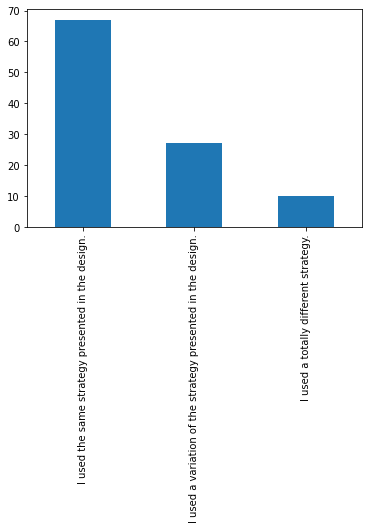

In [90]:
# Strategy
strategy['8-1'].value_counts().plot.bar()

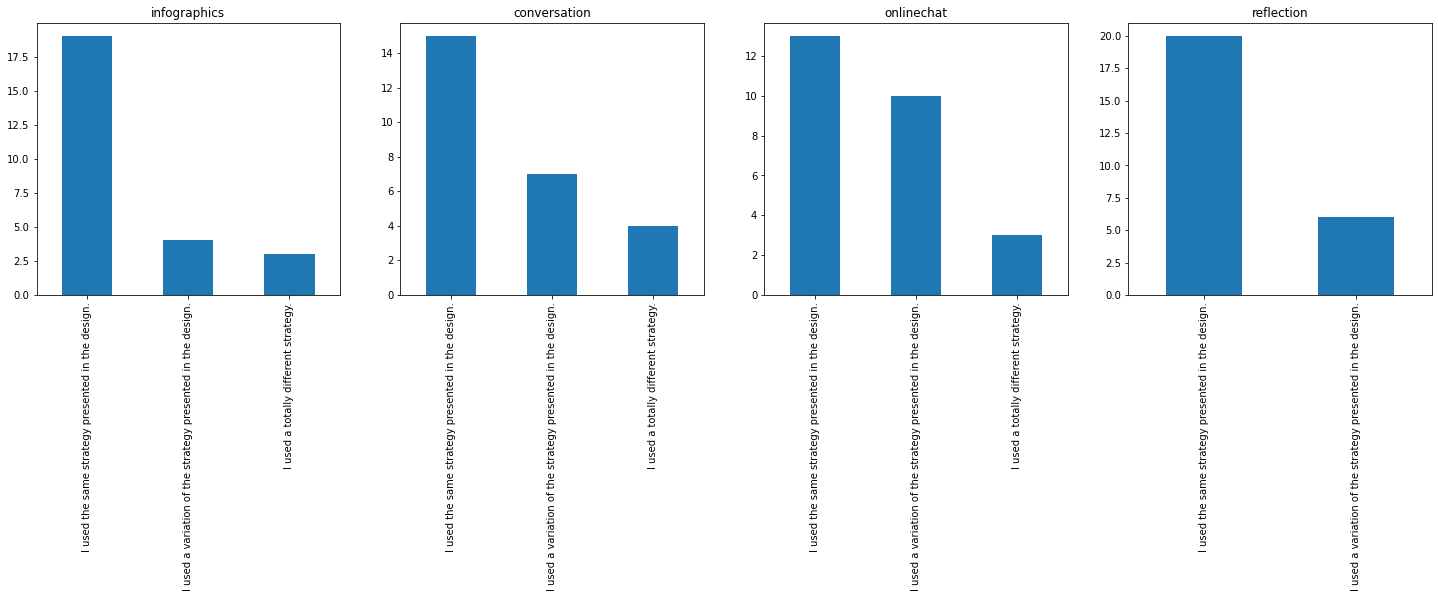

In [91]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, design in enumerate(did_map.values()):
    strategy[strategy['design']==design]['8-1'].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(f'{design}')


In [92]:
adopt = demo['adopt based on security expert advice'] - 4
csquest_pass = csquestquant.join(password[['Motivation After Design', 'Hard to Remember', 'Guessed by Hacker', 'Helpful', 'Guessed by FnF', 'Actual Strength', 'Stronger than Usual']]).join(quest[['Perspicuity', 'Clarity']].join(adopt))
csquest_pass.head()

,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,Motivation After Design,Hard to Remember,Guessed by Hacker,Helpful,Guessed by FnF,Actual Strength,Stronger than Usual,Perspicuity,Clarity,adopt based on security expert advice
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,2.0,-2.0,-2.0,2.0,-2.0,3.0,2.0,2.25,3.00,2
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,3.0,-1.0,-2.0,3.0,-3.0,3.0,3.0,2.75,2.50,3
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,-3.0,-3.0,1.0,-3.0,0.0,1.0,2.50,2.25,2
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,0.0,-2.0,2.0,-2.0,1.5,1.0,1.00,1.25,3
4,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,0.0,-2.0,...,0.0,-3.0,-3.0,-2.0,-3.0,-3.0,0.0,-1.25,-0.25,1


In [93]:
test = {}
designs = []
quests = csquest_pass.columns.to_list()
quests.remove('design')
for i, param in enumerate(quests):
    test[param] = []
    for design in did_map.values():
        test[param].append(csquest_pass[csquest_pass['design']==design][param].to_list())
        designs.append(design) if i<=0 else None

In [94]:
# Performing kruskal test
for k, v in test.items():
    print(f'{k}: {kruskal(*v)}')

Stimulation: KruskalResult(statistic=1.4917385572531041, pvalue=0.6841783755251889)
Trust: KruskalResult(statistic=1.0477643321438792, pvalue=0.7896965327872166)
Real life encouragement: KruskalResult(statistic=0.6490295695593452, pvalue=0.8851220246590592)
Example helped: KruskalResult(statistic=7.44507353247318, pvalue=0.058986670867872286)
Encouragement: KruskalResult(statistic=1.5525204328466617, pvalue=0.6702027491816334)
Capable: KruskalResult(statistic=3.3890169494941267, pvalue=0.3354440629843259)
Confident: KruskalResult(statistic=4.159873875815915, pvalue=0.24471010190815018)
Personal Connection: KruskalResult(statistic=1.4213407919384557, pvalue=0.7005400440250553)
Ease to follow message: KruskalResult(statistic=72.97972125132108, pvalue=9.81813930774536e-16)
Novel: KruskalResult(statistic=2.8295304979164646, pvalue=0.4186617143266056)
Well Organized: KruskalResult(statistic=2.3796657857806567, pvalue=0.4974310543678969)
Engaging: KruskalResult(statistic=3.9256215096378635, 

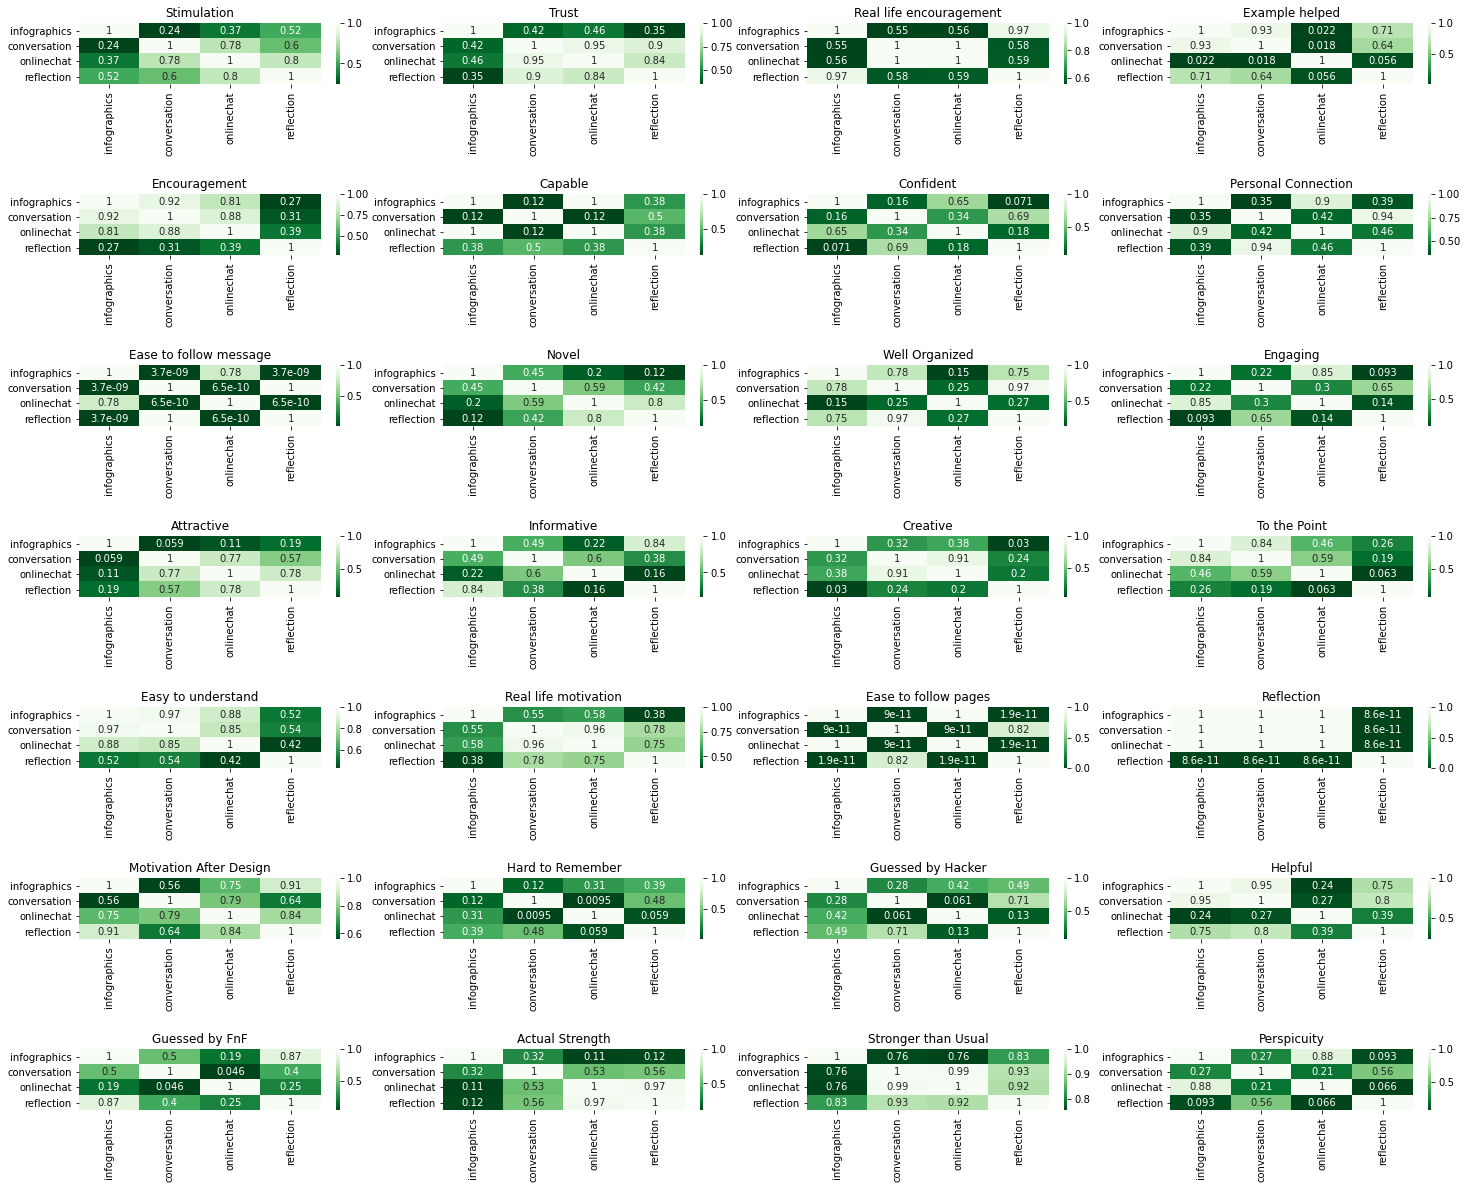

In [95]:
nrows, ncols = 7, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 20))
fig.subplots_adjust(hspace=1.8)

k=0
for i in range(nrows):
    for j in range(ncols):
        if k < len(quests):
            data = sp.posthoc_dunn(test[quests[k]])
            data.index = data.index.map(get_design)
            data.columns = data.columns.map(get_design)
            sns.heatmap(data, annot=True, ax=axes[i][j], cmap="Greens_r")
            axes[i][j].set_title(quests[k])
            k += 1

<AxesSubplot:>

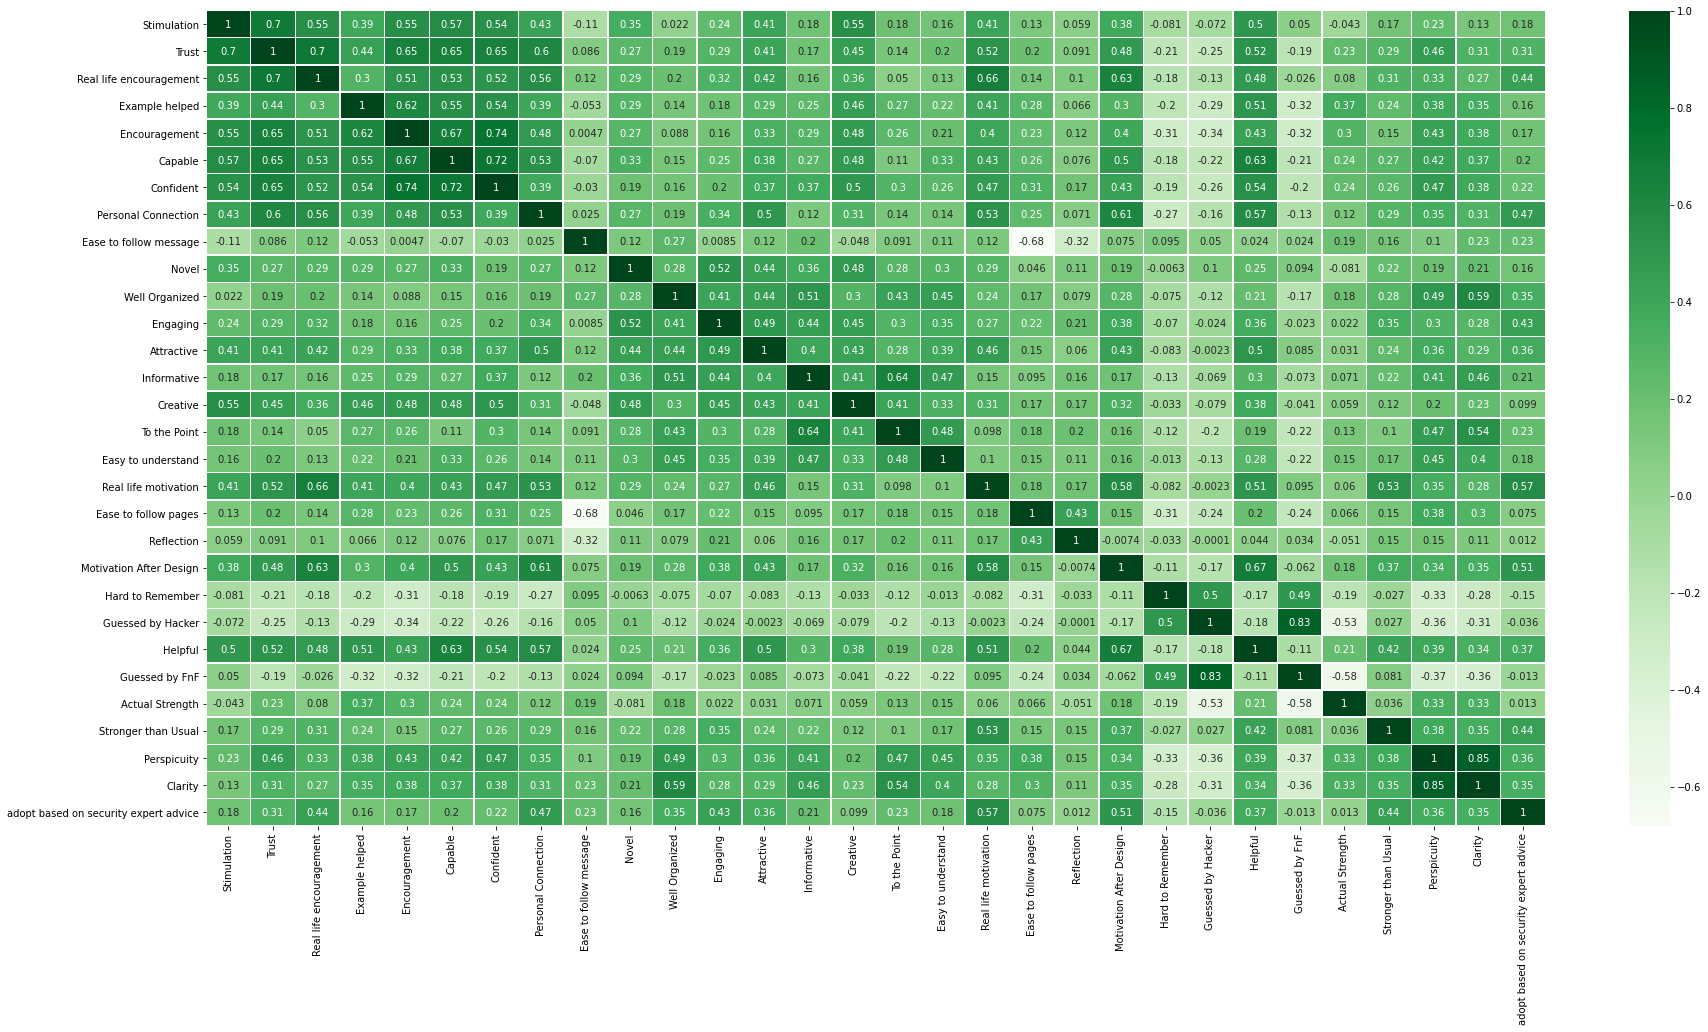

In [96]:
cormat = csquest_pass.corr(method='pearson')

fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)

## Relationship between experience and password strength

In [97]:
temp_demo_field = ['gender', 'age', 'highest education']
temp_pass_field = ['Password Strength', 'Actual Strength']
exp_passstrength = password[temp_pass_field].join(demo[temp_demo_field])
exp_passstrength.head()

,Password Strength,Actual Strength,gender,age,highest education
0,2.0,3.0,Woman,55-59 years old,Four-year College Degree
1,3.0,3.0,Man,55-59 years old,Four-year College Degree
2,2.0,0.0,Woman,50-54 years old,High School Graduate
3,2.0,1.5,Man,55-59 years old,High School Graduate
4,1.0,-3.0,Man,30-34 years old,Four-year College Degree


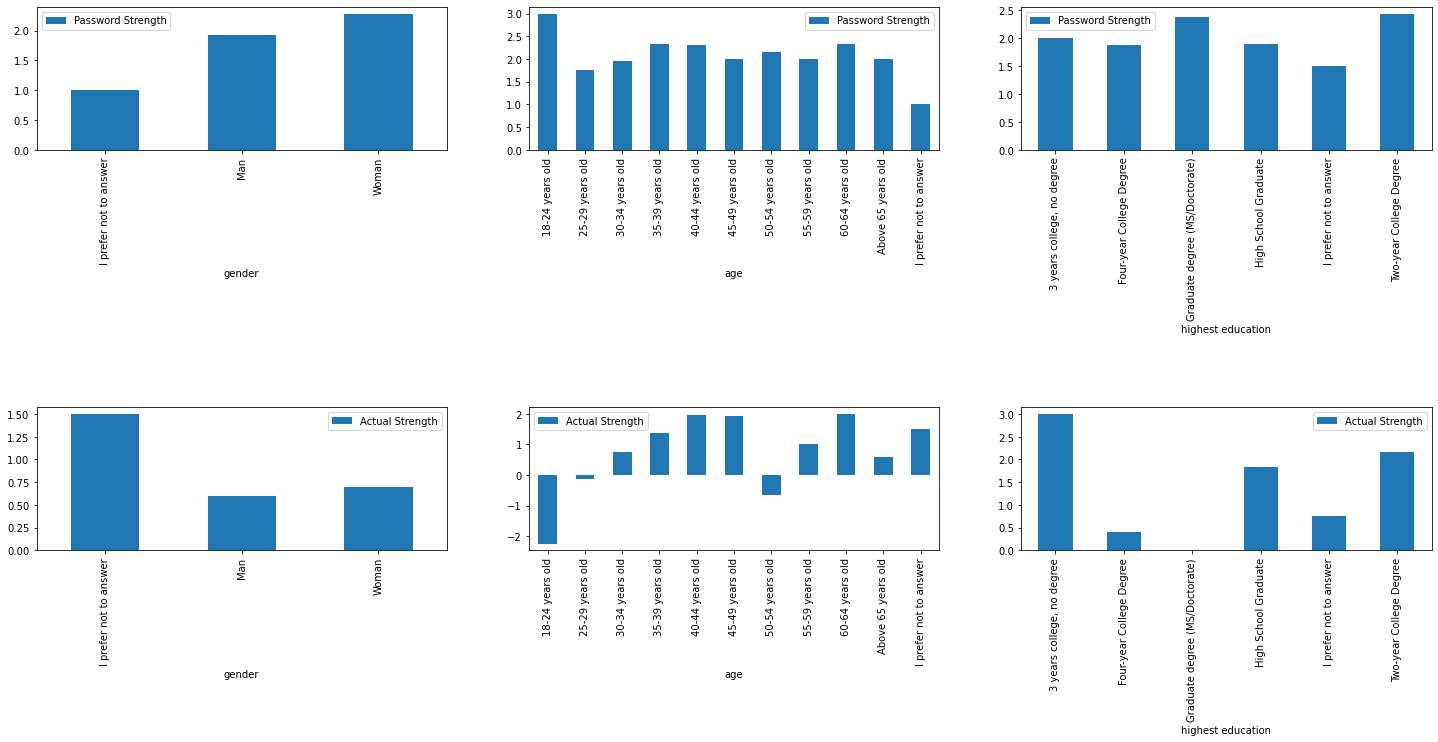

In [98]:
fig, axes = plt.subplots(len(temp_pass_field), len(temp_demo_field), figsize=(25, 10))
fig.subplots_adjust(hspace=1.8)

for i, tpass in enumerate(temp_pass_field):
    for j, tdemo in enumerate(temp_demo_field):
        exp_passstrength.groupby(tdemo)[tpass].mean().to_frame().plot.bar(ax=axes[i][j])

In [99]:
demo_list = ['age', 'gender', 'highest education']
csquest_list = ['Personal Connection', 'Real life motivation']

temp_demo = demo[demo_list].copy()
temp_demo['age'] = temp_demo['age'].str.strip('years old').str.strip()
temp_csquest = csquestquant[csquest_list].copy()

demo_csquest = temp_demo.join(temp_csquest)

In [100]:
# Age analysis
young_group = ['18-24', '25-29', '30-34', '35-39']

young = demo_csquest[demo_csquest['age'].apply(lambda x: x in young_group)]
old = demo_csquest[demo_csquest['age'].apply(lambda x: x not in young_group)]

print(f'Young: {len(young)}; Old: {len(old)}')

for cat in csquest_list:
    k = kruskal(young[cat], old[cat])
    print(f'{cat}: {k}')

Young: 65; Old: 39
Personal Connection: KruskalResult(statistic=2.6011331660945425, pvalue=0.10678733778108004)
Real life motivation: KruskalResult(statistic=0.32389867247567244, pvalue=0.5692740518810291)


In [101]:
# Gender analysis

male = demo_csquest[demo_csquest['gender']=='Man']
female = demo_csquest[demo_csquest['gender']=='Woman']

print(f'Male: {len(male)}; Female: {len(female)}')

for cat in csquest_list:
    k = kruskal(male[cat], female[cat])
    print(f'{cat}: {k}')

Male: 75; Female: 28
Personal Connection: KruskalResult(statistic=15.247040922605752, pvalue=9.432442119282691e-05)
Real life motivation: KruskalResult(statistic=4.747086640829795, pvalue=0.029347941160085246)


In [102]:
# Education Analysis
educated_group = ['Four-year College Degree', 'Graduate degree (MS/Doctorate)']

educated = demo_csquest[demo_csquest['highest education'].apply(lambda x: x in educated_group)]
uneducated = demo_csquest[demo_csquest['highest education'].apply(lambda x: x not in educated_group)]

print(f'Educated: {len(educated)}; Uneducated: {len(uneducated)}')

for cat in csquest_list:
    k = kruskal(educated[cat], uneducated[cat])
    print(f'{cat}: {k}')

Educated: 83; Uneducated: 21
Personal Connection: KruskalResult(statistic=1.4295386185741756, pvalue=0.23183975092544434)
Real life motivation: KruskalResult(statistic=0.7037041237389832, pvalue=0.4015418471102917)
